<a href="https://colab.research.google.com/github/Elena-FPJ/first_project/blob/master/%D0%A1%D0%B1%D0%BE%D1%80%D0%BD%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%E2%80%94_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import shap

from sklearn.metrics import fbeta_score, make_scorer

from sklearn.model_selection import train_test_split

from sklearn.tree import export_text
from sklearn.tree import plot_tree

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance

from sklearn.impute import SimpleImputer


from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from scipy import stats as st
from scipy.stats import binom, poisson, norm

from sklearn.dummy import DummyRegressor, DummyClassifier

RANDOM_STATE = 42
TEST_SIZE = 0.25

In [9]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_job_satisfaction_rate.csv')
X_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test_features.csv')
y_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test_target_job_satisfaction_rate.csv')

In [10]:
train.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [11]:
X_test.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [12]:
y_test.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [13]:
def prep_df (df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    df.info()
    print ('Количество пропусков:')
    print ()
    print (df.isna().sum())
    print ('Количество дубликатов:')
    print ()
    print (df.duplicated().sum())
    display (df.head())

In [15]:
for df in [train, X_test, y_test]:
    prep_df (df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB
Количество пропусков:

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB
Количество пропусков:

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64
Ко

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
Количество пропусков:

id                       0
job_satisfaction_rate    0
dtype: int64
Количество дубликатов:

0


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [16]:
train['dept'].unique()

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

In [17]:
train['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [18]:
train['workload'].unique()

array(['medium', 'high', 'low'], dtype=object)

In [19]:
train['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [20]:
train['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

In [21]:
X_test['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [22]:
X_test['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [23]:
X_test['workload'].unique()

array(['medium', 'low', 'high', ' '], dtype=object)

In [24]:
X_test['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [25]:
X_test['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

In [35]:
def plot_cat (df, column, cmap,  title):
    df[column].value_counts().sort_values().plot(
         y = column,
         kind = 'pie',
         figsize = (8, 8),
         legend = False,
         cmap = cmap,
        fontsize = 15,
         autopct='%1.1f%%'
    )
    plt.title(f'Pаспределение сотрудников по {title}', fontsize = 20)
    plt.show()

In [27]:
def plot_num_cont (df, column, set_xlabel, suptitle, bins):
    fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
    sns.histplot(df, x = column, ax = axs[0], bins = bins, kde = True)
    axs[0].set_xlabel(set_xlabel)
    axs[0].set_ylabel('Количество')
    axs[0].set_title('Гистограмма')

    sns.boxplot(data = df, x = column, ax = axs[1])
    axs[1].set_title('Диаграмма размаха')
    axs[1].set_xlabel(set_xlabel)
    axs[1].set_xticks([])
    fig.suptitle(suptitle)
    plt.show()

    print (df[column].describe())

In [28]:
def plot_num_discr (df, column, title):
    fig = plt.subplots(figsize = (15,10))
    sns.countplot(data = df,
                alpha=0.7,
                x = column
               )
    plt.title(f'Pаспределение сотрудников по {title}', fontsize = 20)
    plt.show()

    print (df[column].describe())

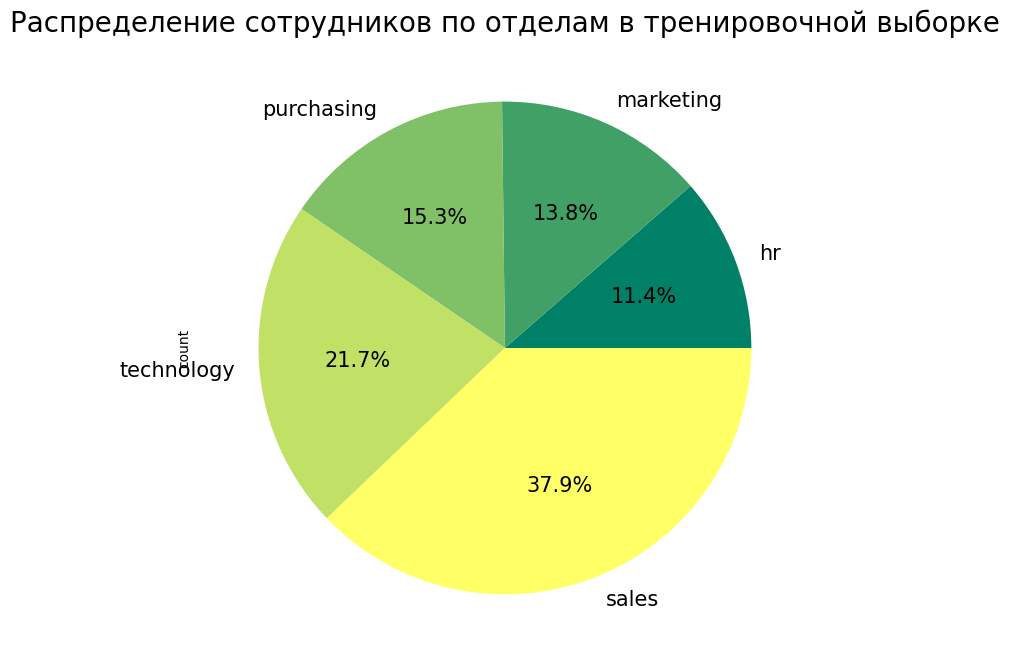

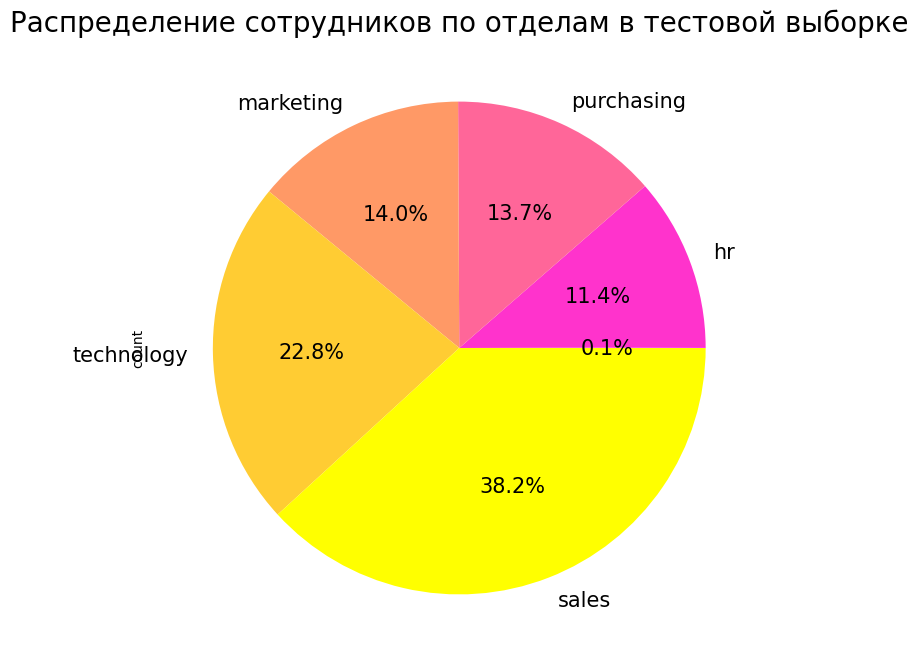

In [36]:
plot_cat(train,
         'dept',
         'summer',
         'отделам в тренировочной выборке')
plot_cat(X_test,
         'dept',
         'spring',
         'отделам в тестовой выборке')

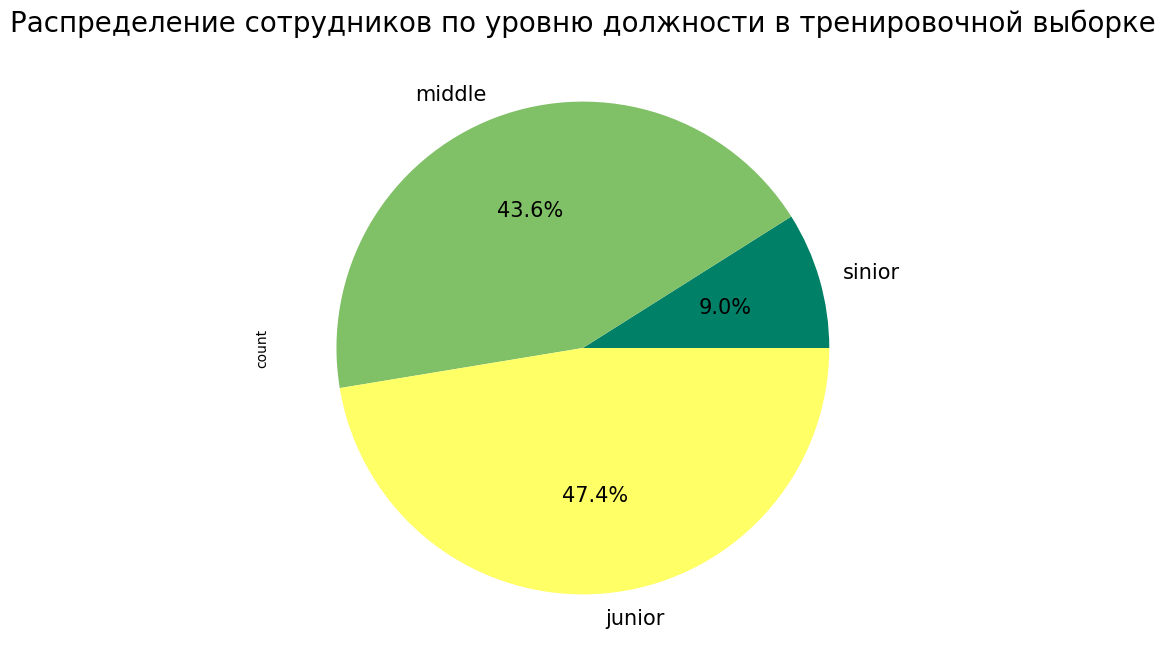

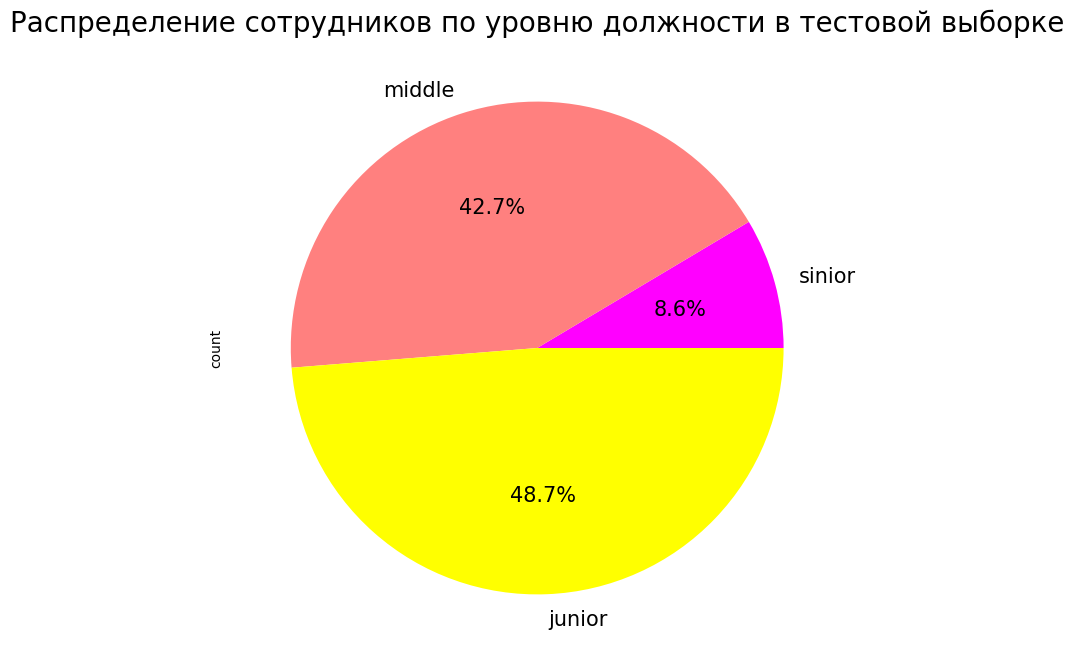

In [37]:
plot_cat(train,
         'level',
         'summer',
         'уровню должности в тренировочной выборке')
plot_cat(X_test,
         'level',
         'spring',
         'уровню должности в тестовой выборке')

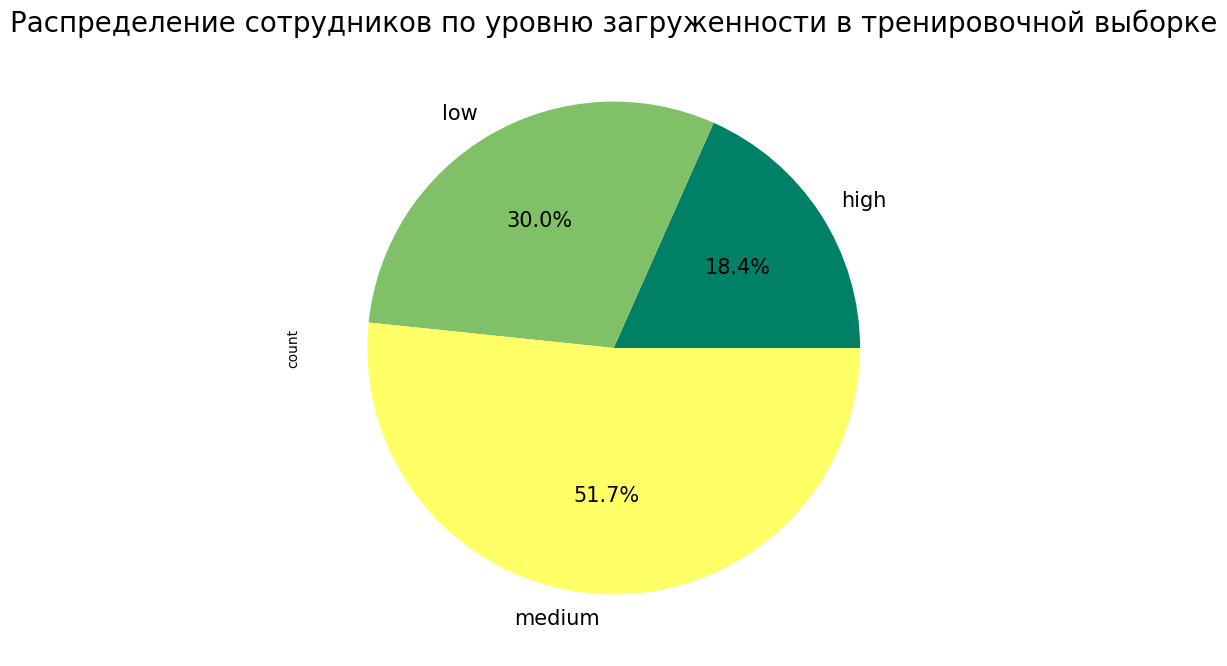

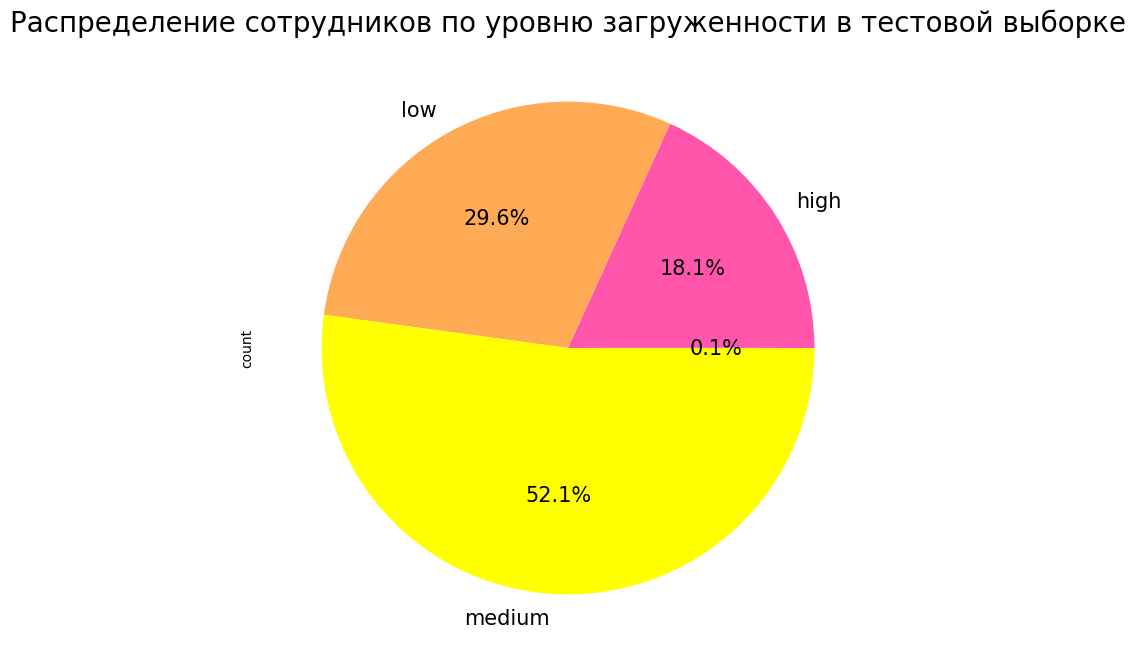

In [38]:
plot_cat(train,
         'workload',
         'summer',
         'уровню загруженности в тренировочной выборке')
plot_cat(X_test,
         'workload',
         'spring',
         'уровню загруженности в тестовой выборке')

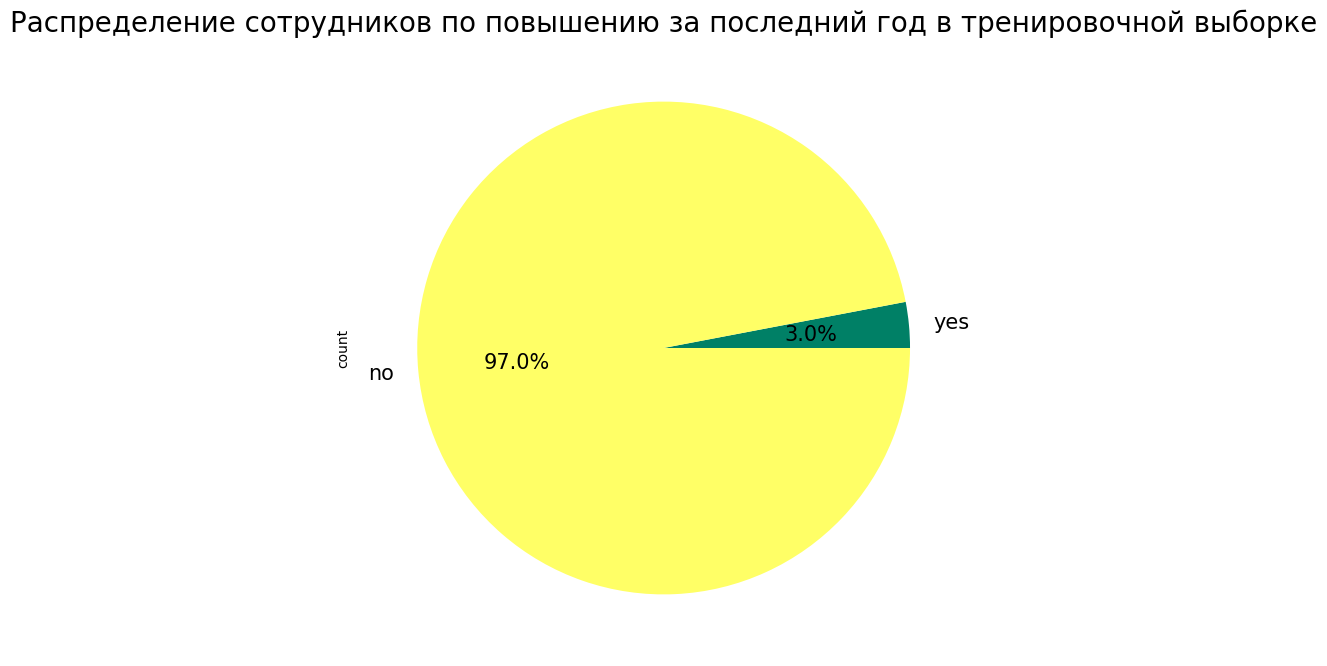

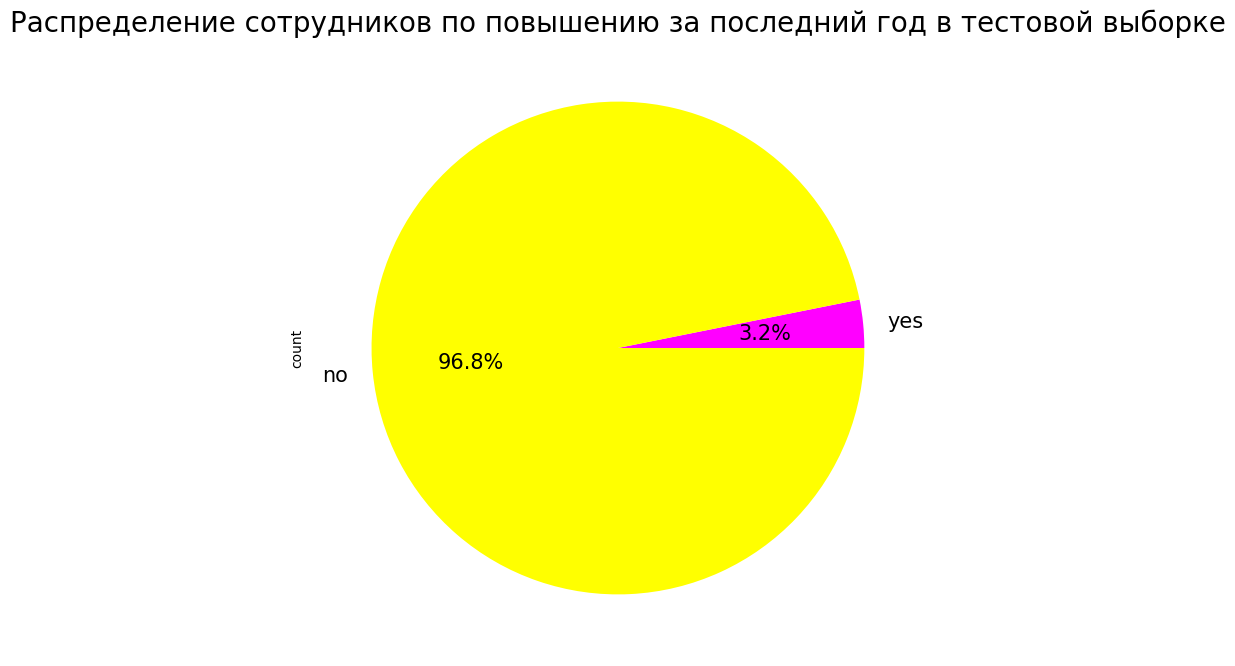

In [40]:
plot_cat(train,
         'last_year_promo',
         'summer',
         'повышению за последний год в тренировочной выборке')
plot_cat(X_test,
         'last_year_promo',
         'spring',
         'повышению за последний год в тестовой выборке')

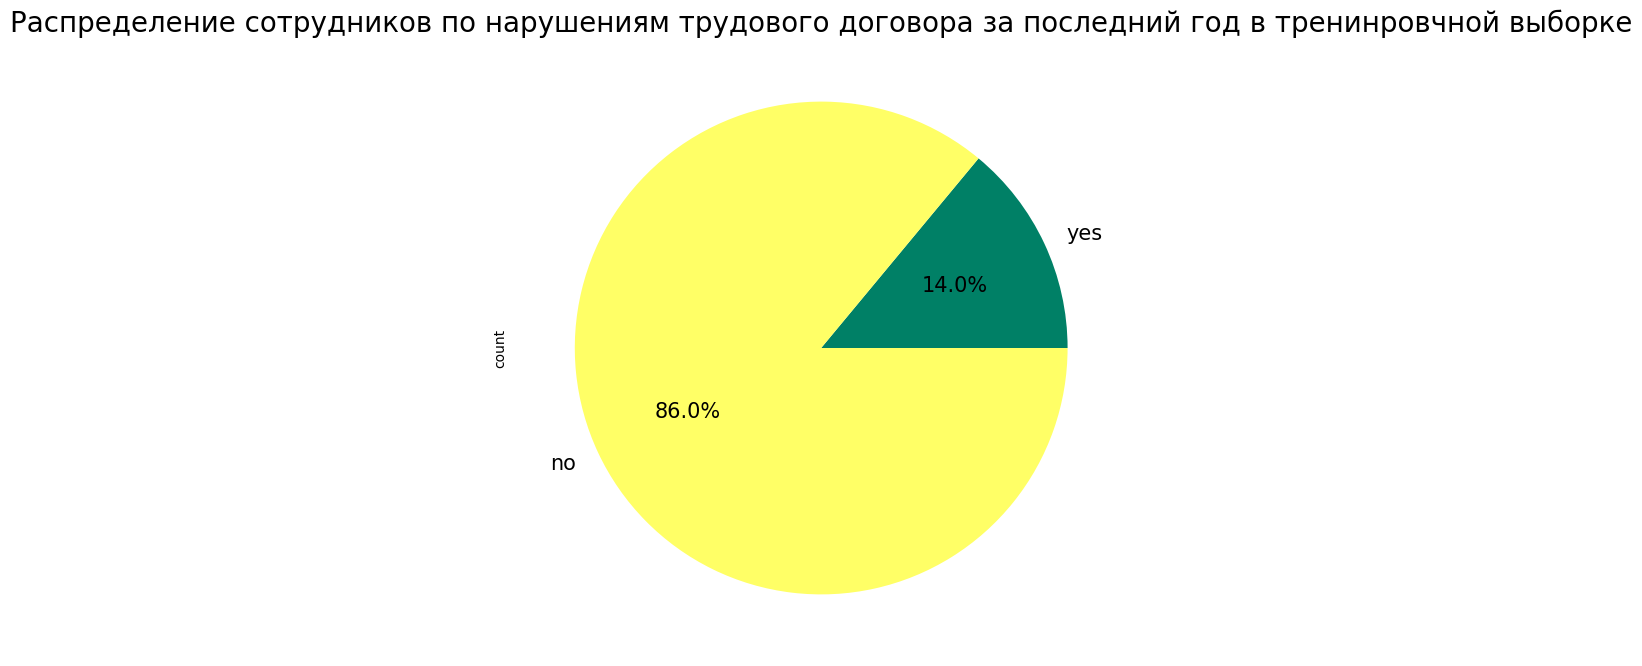

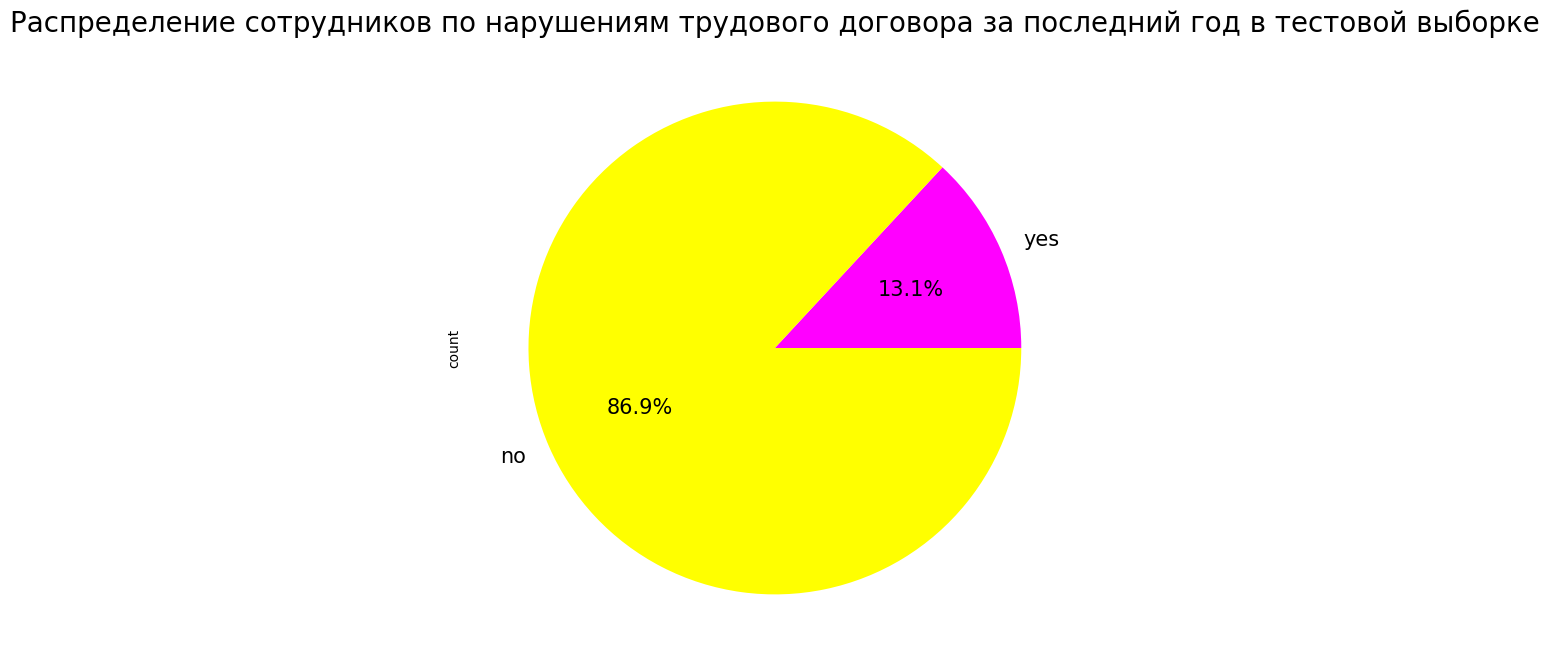

In [41]:
plot_cat(train,
         'last_year_violations',
         'summer',
         'нарушениям трудового договора за последний год в тренинровчной выборке')
plot_cat(X_test,
         'last_year_violations',
         'spring',
         'нарушениям трудового договора за последний год в тестовой выборке')

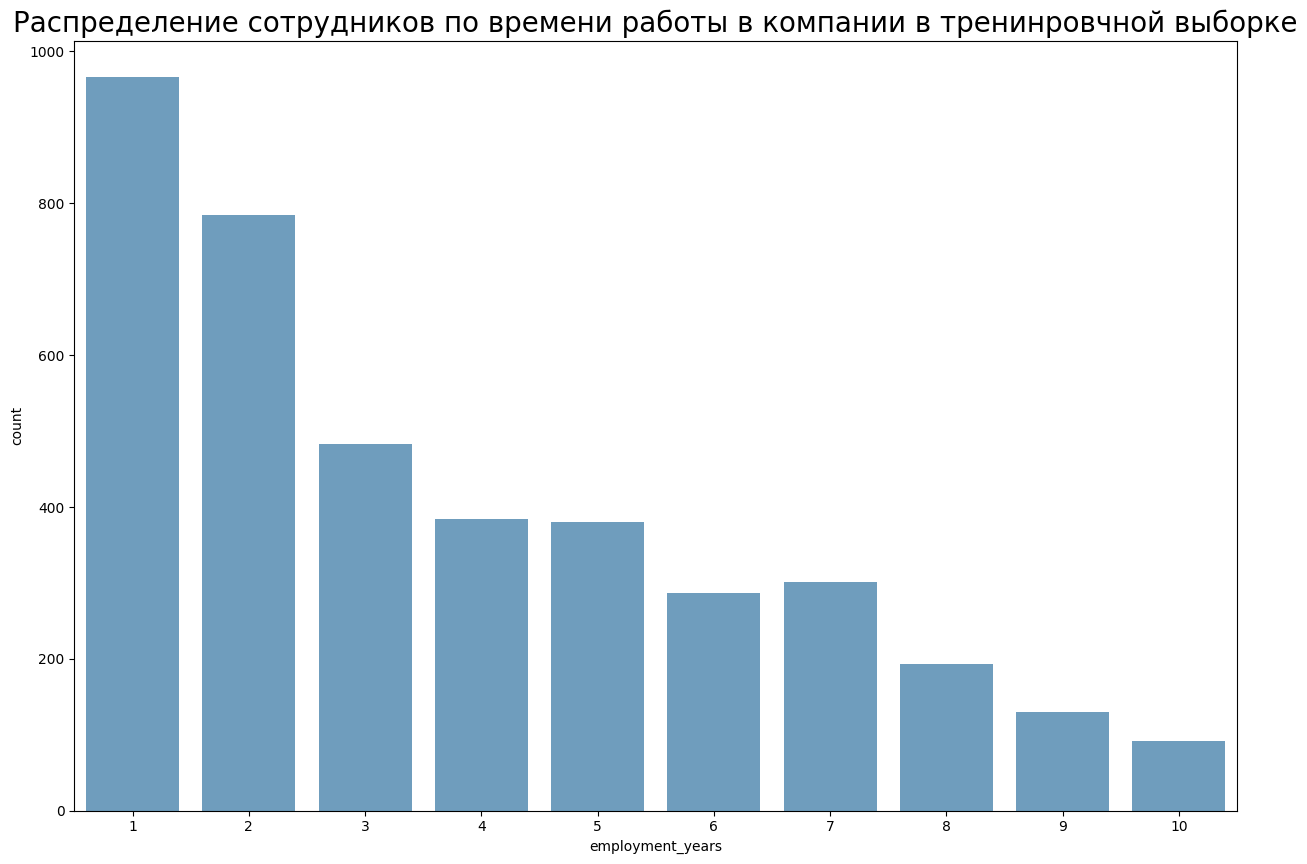

count    4000.000000
mean        3.718500
std         2.542513
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


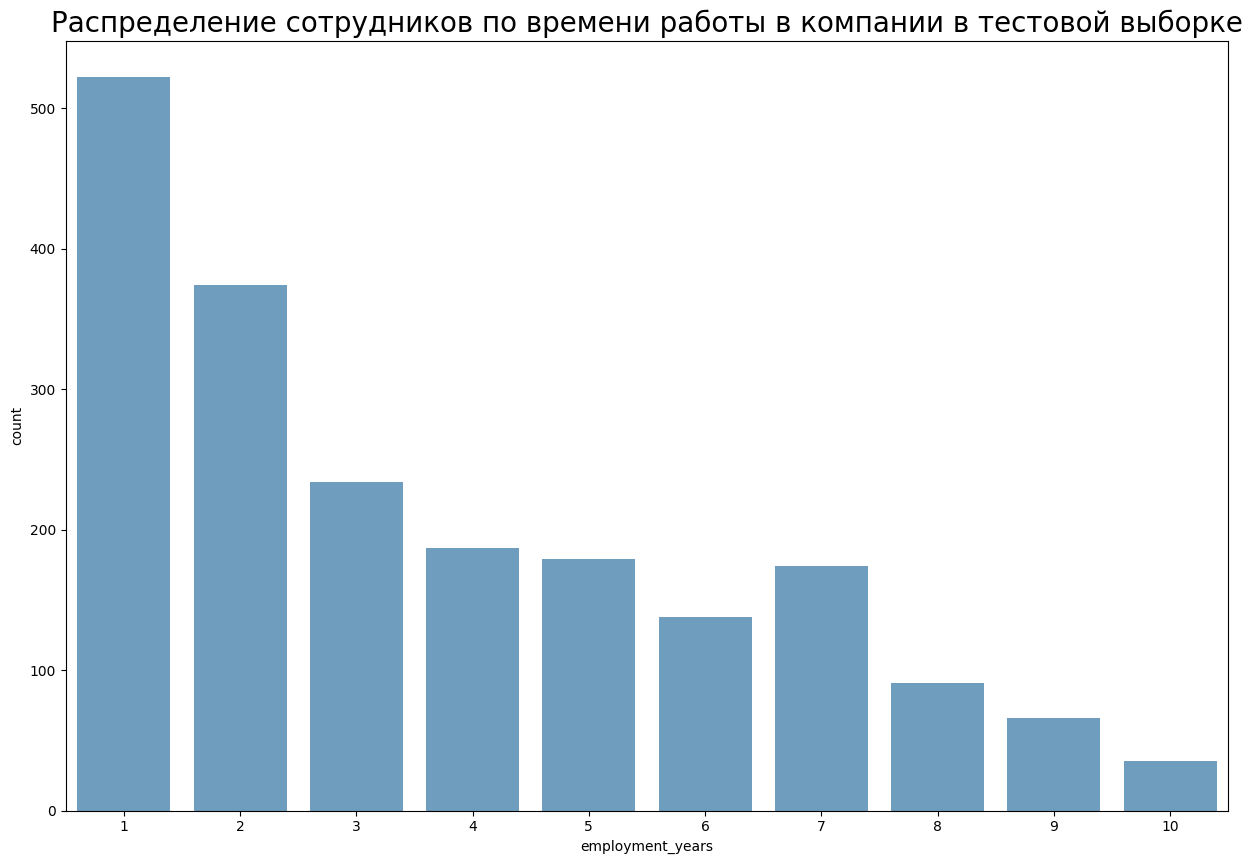

count    2000.000000
mean        3.666500
std         2.537222
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


In [42]:
plot_num_discr (train, 'employment_years', 'времени работы в компании в тренинровчной выборке')

plot_num_discr (X_test, 'employment_years', 'времени работы в компании в тестовой выборке')

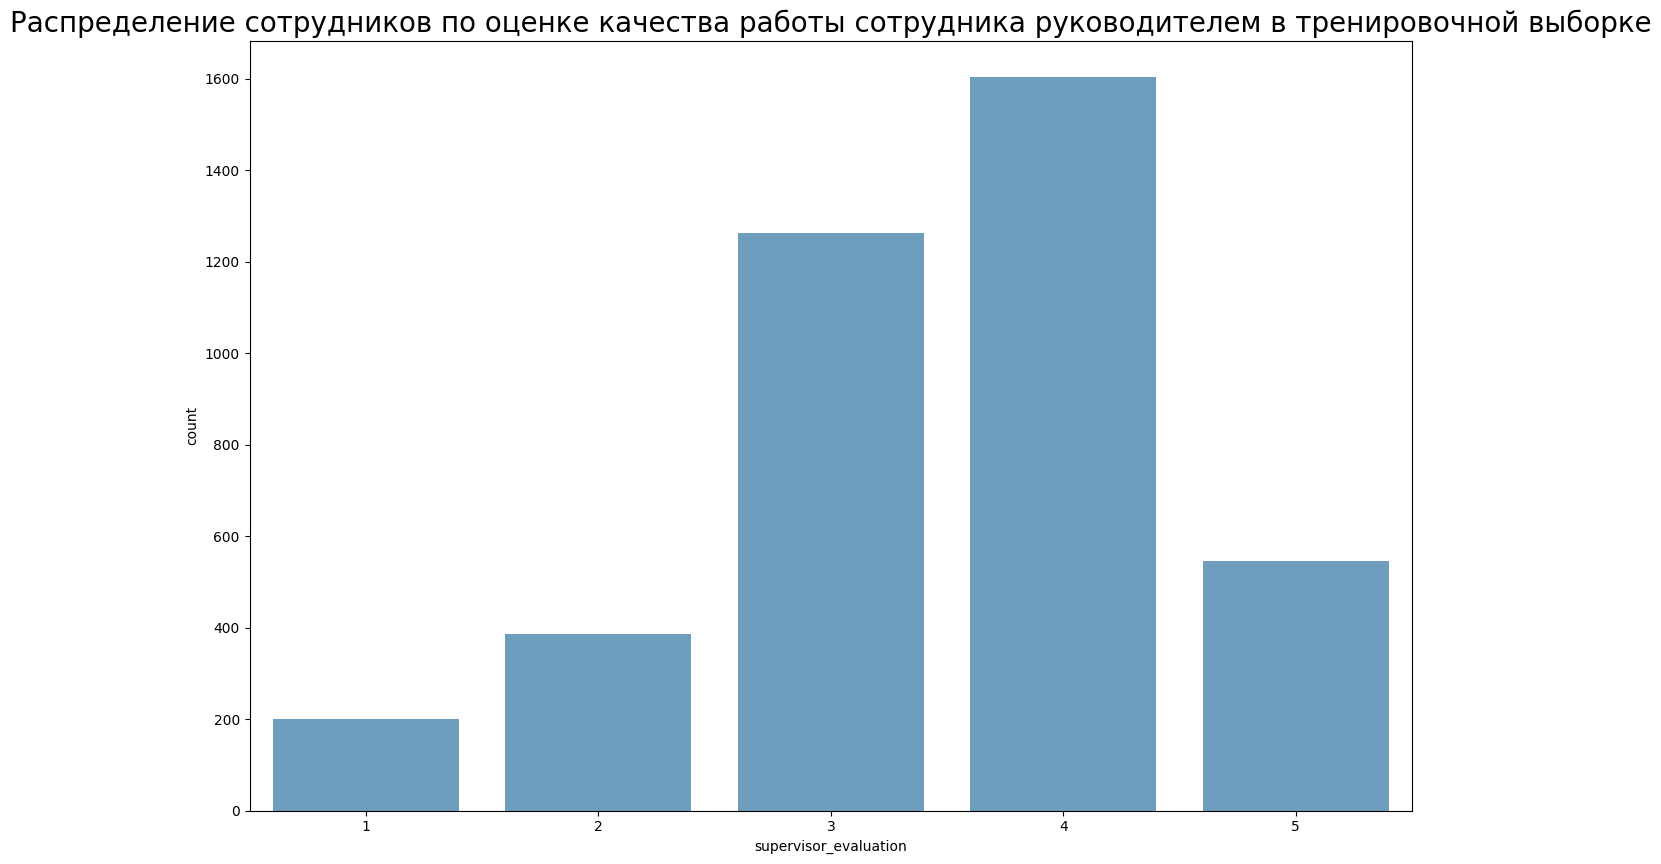

count    4000.000000
mean        3.476500
std         1.008812
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


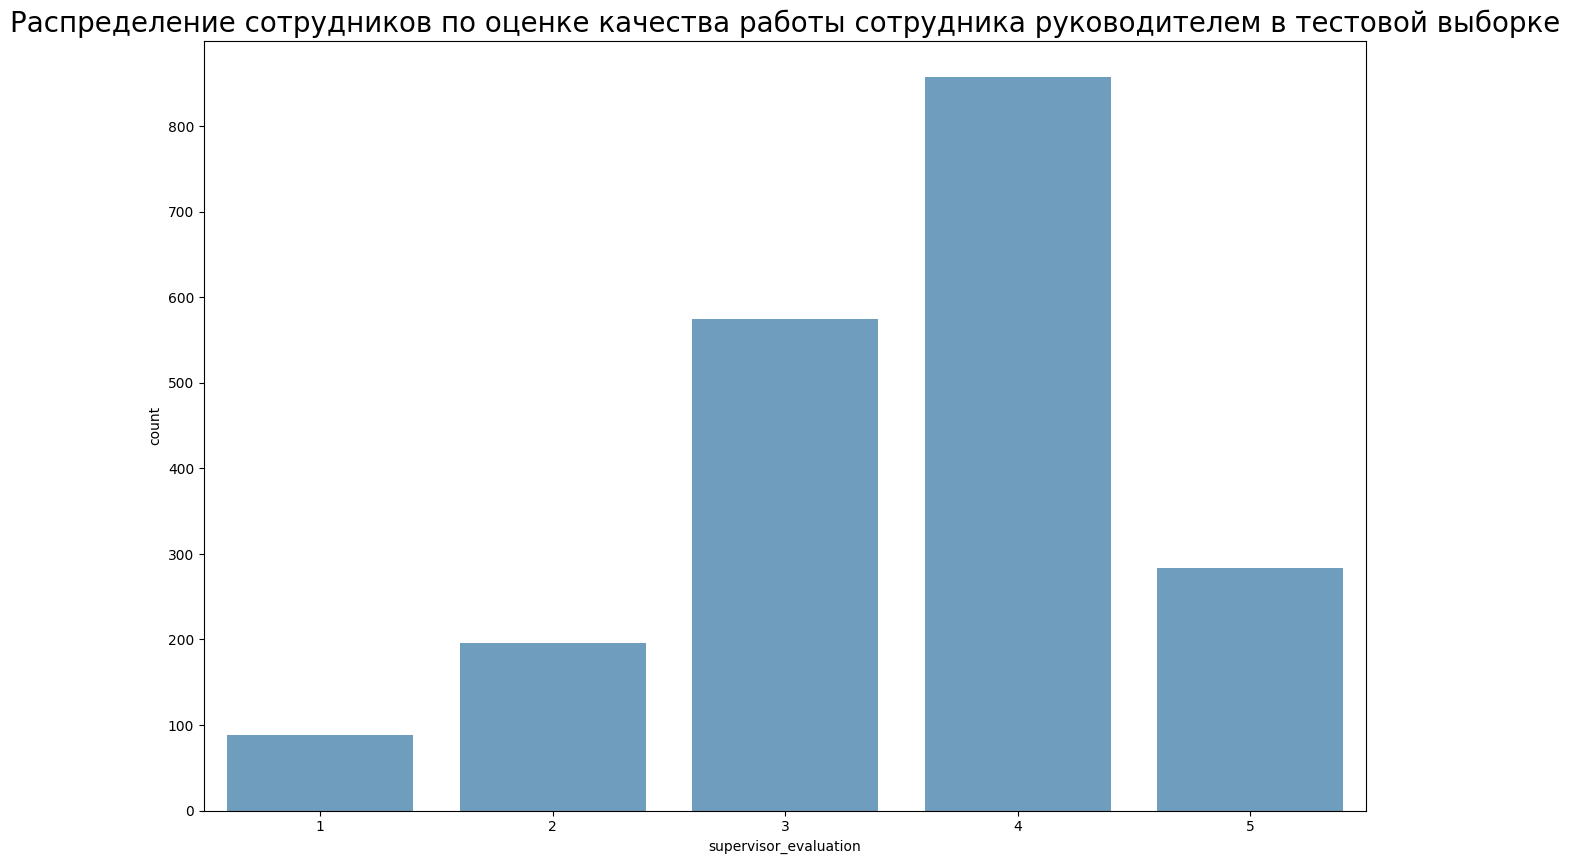

count    2000.000000
mean        3.526500
std         0.996892
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


In [43]:
plot_num_discr (train, 'supervisor_evaluation', 'оценке качества работы сотрудника руководителем в тренировочной выборке')

plot_num_discr (X_test, 'supervisor_evaluation', 'оценке качества работы сотрудника руководителем в тестовой выборке')

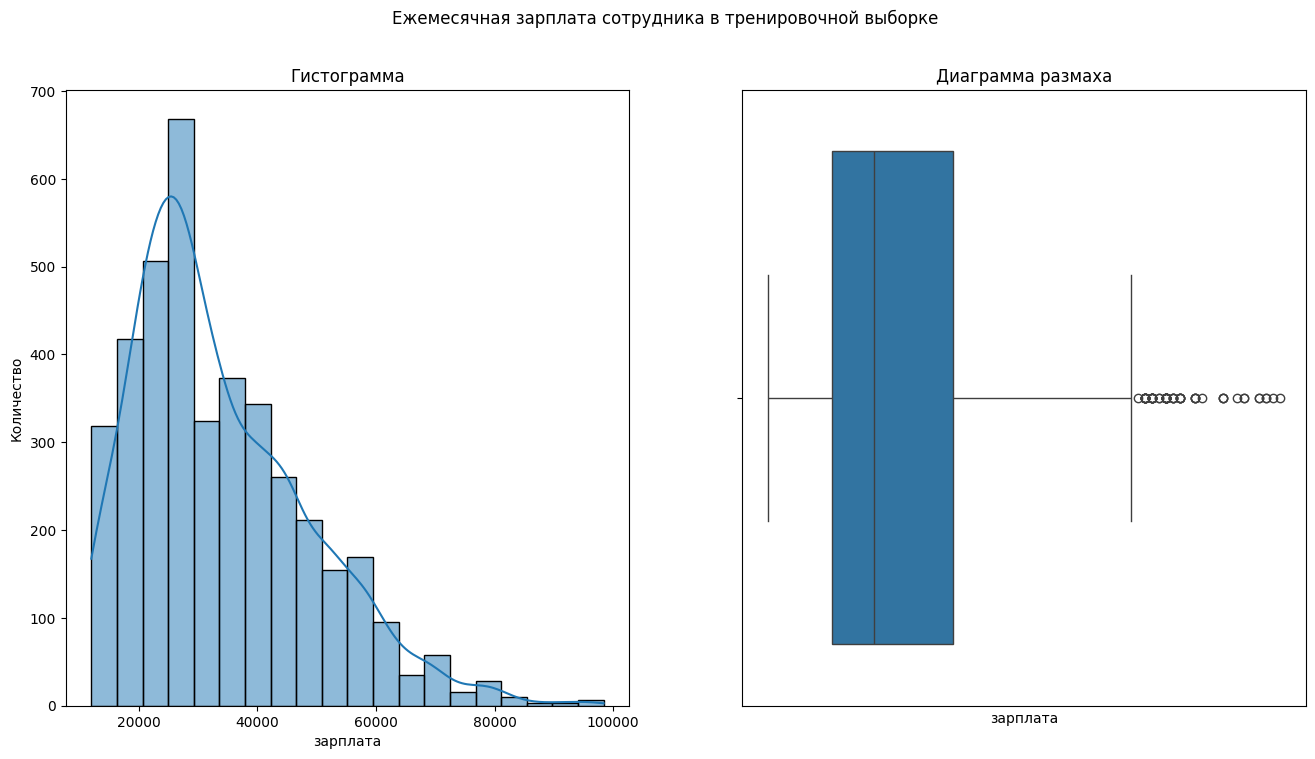

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64


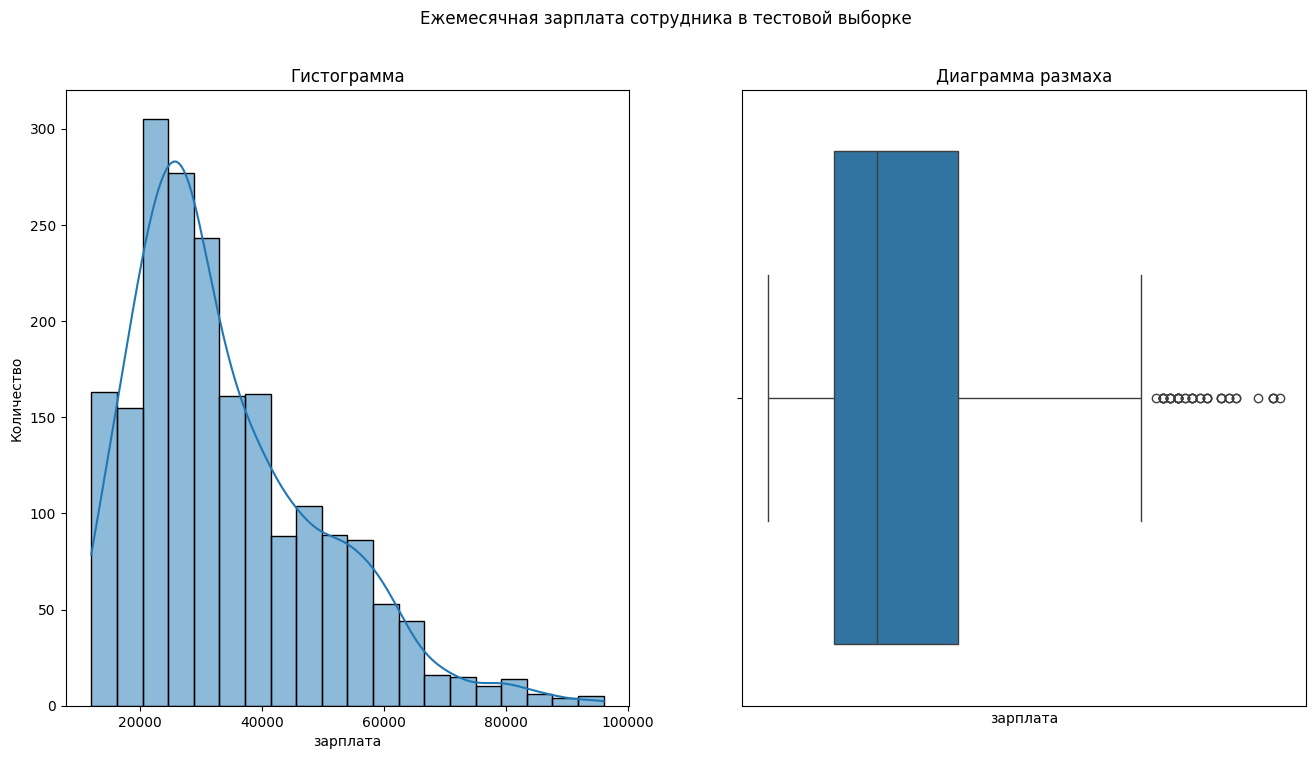

count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


In [44]:
plot_num_cont (train,
               'salary',
               'зарплата',
               'Ежемесячная зарплата сотрудника в тренировочной выборке',
               20)
plot_num_cont (X_test,
               'salary',
               'зарплата',
               'Ежемесячная зарплата сотрудника в тестовой выборке',
               20)

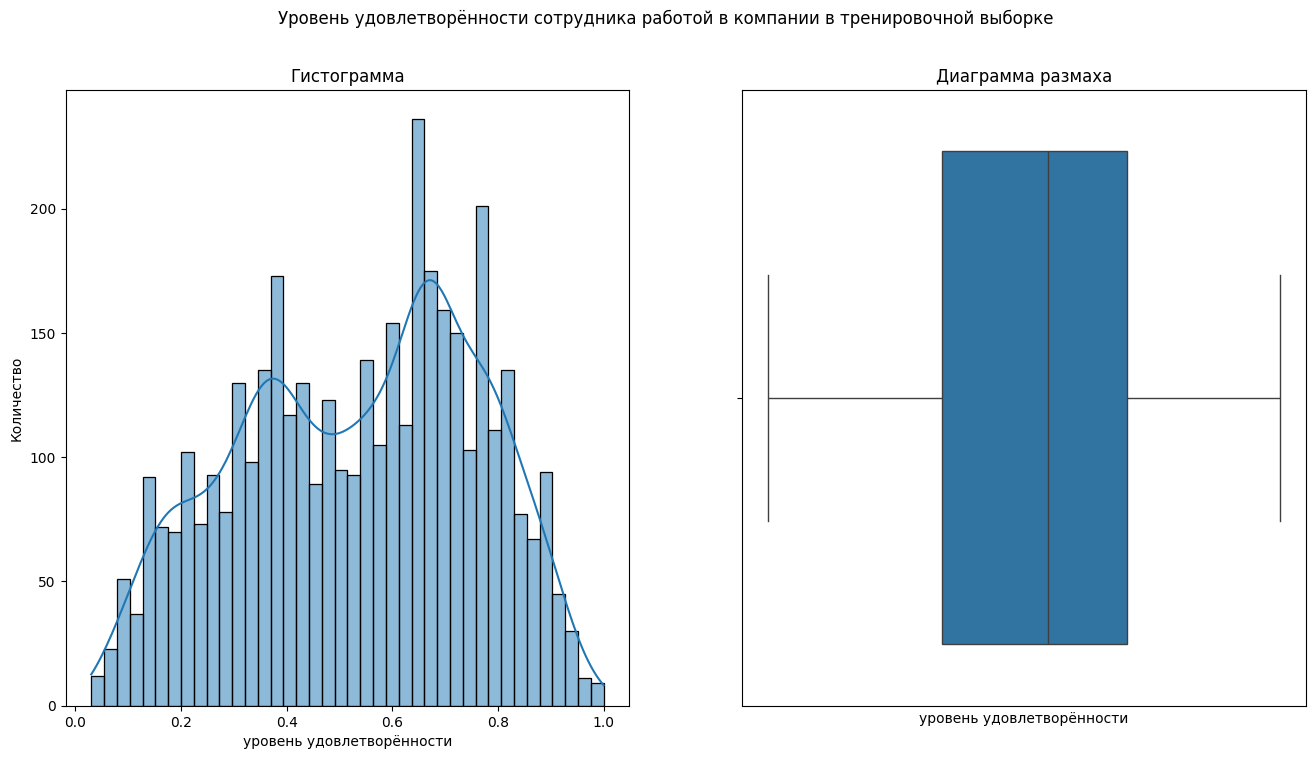

count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64


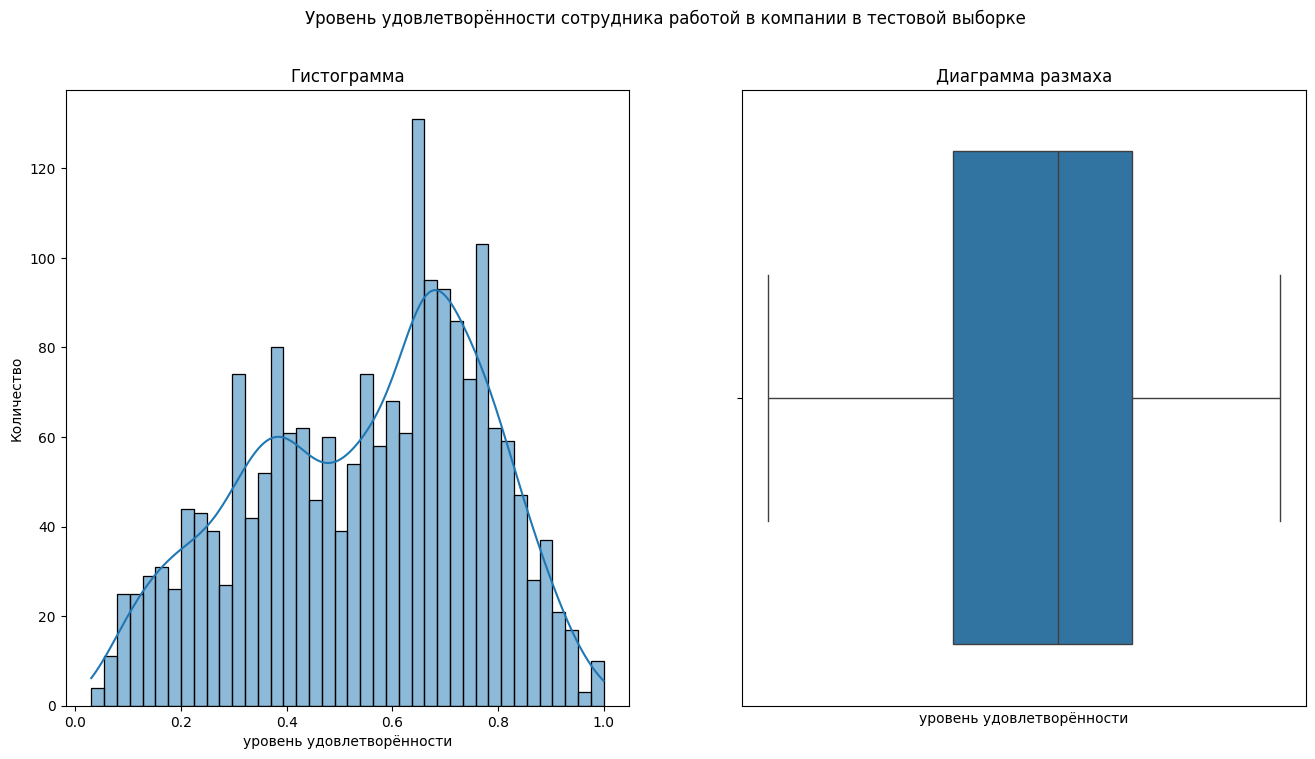

count    2000.00000
mean        0.54878
std         0.22011
min         0.03000
25%         0.38000
50%         0.58000
75%         0.72000
max         1.00000
Name: job_satisfaction_rate, dtype: float64


In [45]:
plot_num_cont (train,
               'job_satisfaction_rate',
               'уровень удовлетворённости',
               'Уровень удовлетворённости сотрудника работой в компании в тренировочной выборке',
               40)
plot_num_cont (y_test,
               'job_satisfaction_rate',
               'уровень удовлетворённости',
               'Уровень удовлетворённости сотрудника работой в компании в тестовой выборке',
               40)

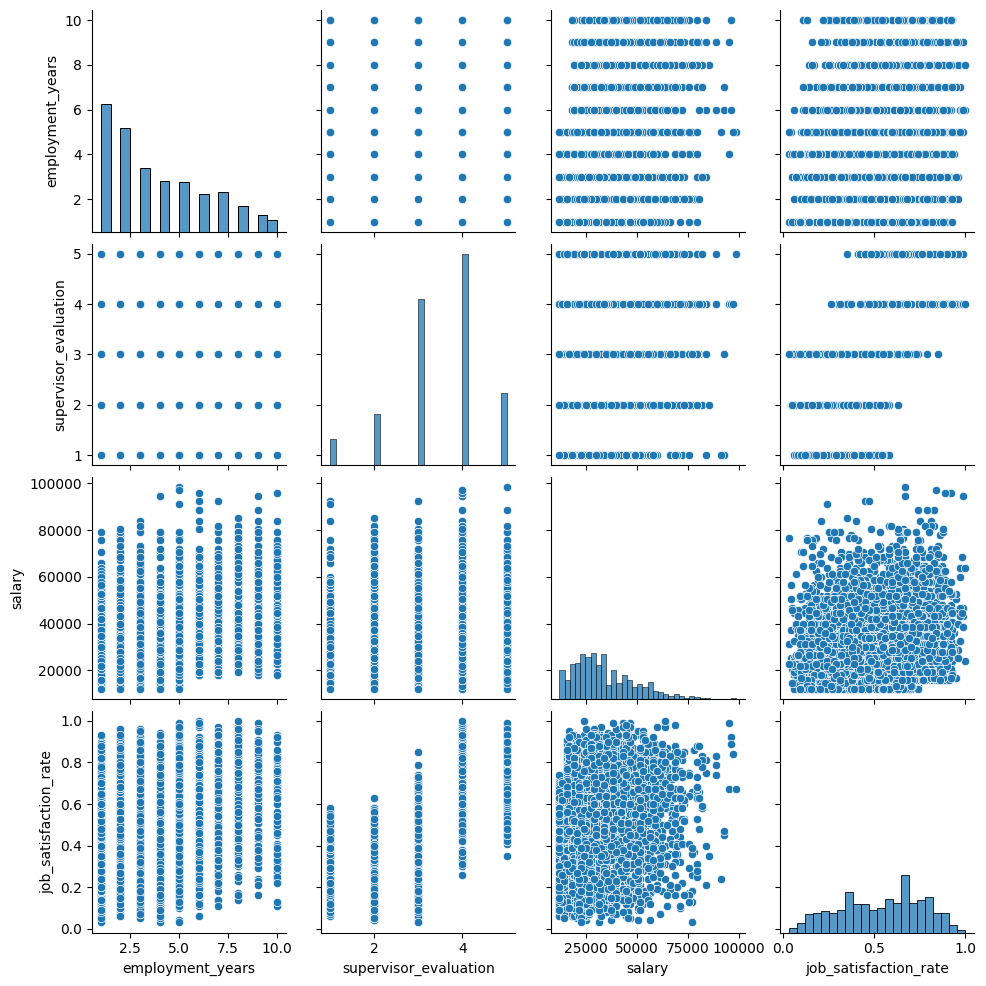

In [46]:
sns.pairplot(train.drop(['id'], axis=1))
plt.show()

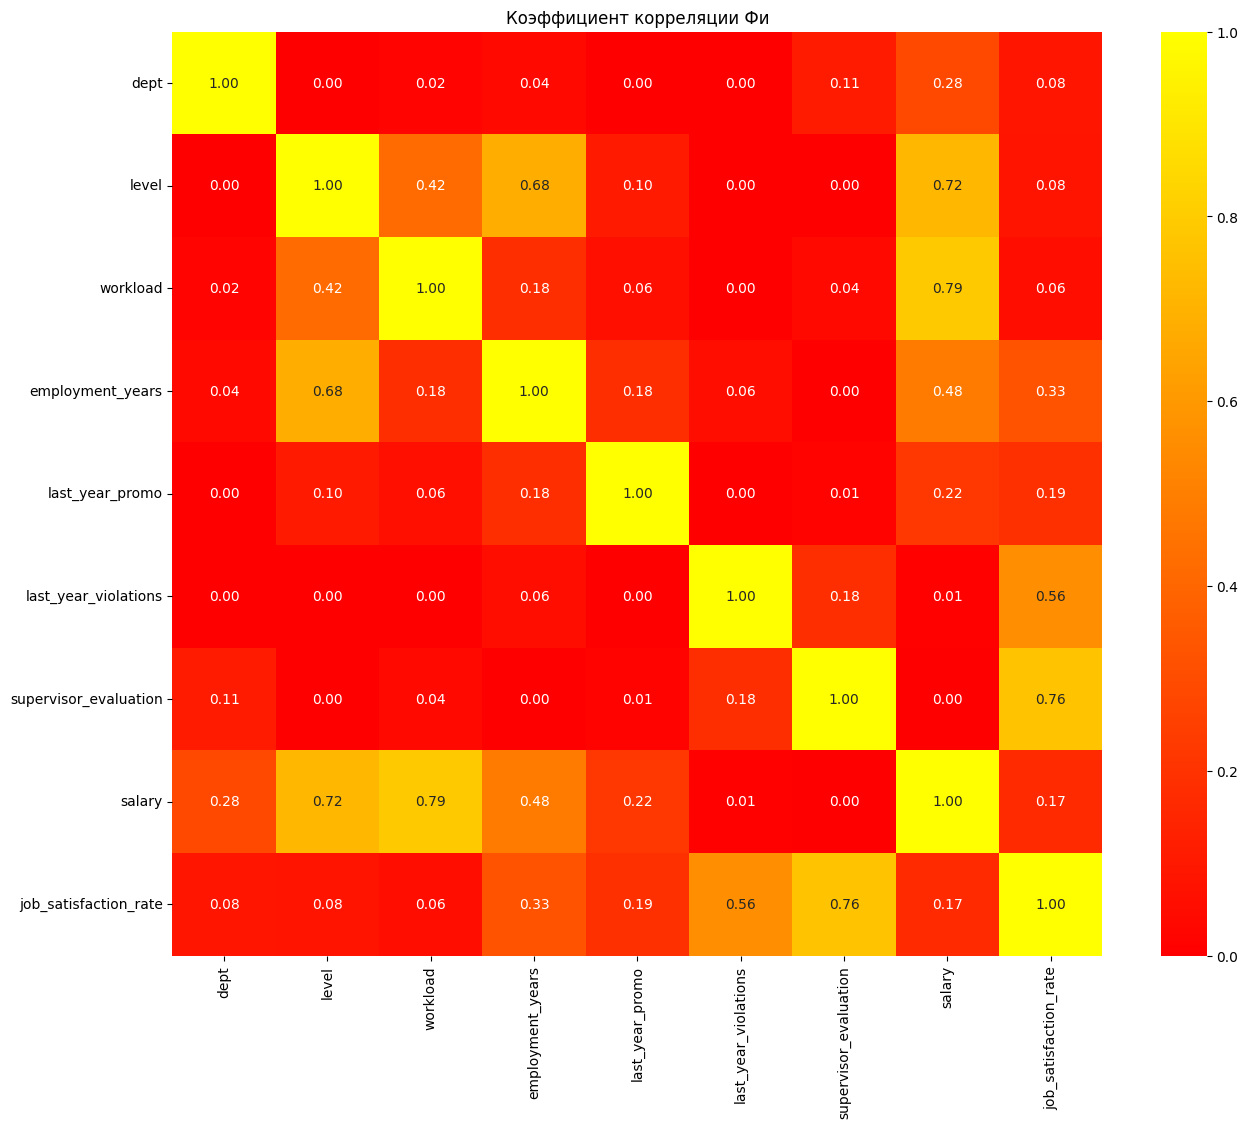

In [48]:
interval_cols = {
    'salary',
    'job_satisfaction_rate'
}
fig, ax = plt.subplots(figsize = (15,12))
plt.title('Коэффициент корреляции Фи')
hmap = sns.heatmap(train.drop(['id'], axis = 1).phik_matrix(interval_cols = interval_cols),
            annot = True,
            cmap = 'autumn',
            fmt = '.2f')
plt.show()

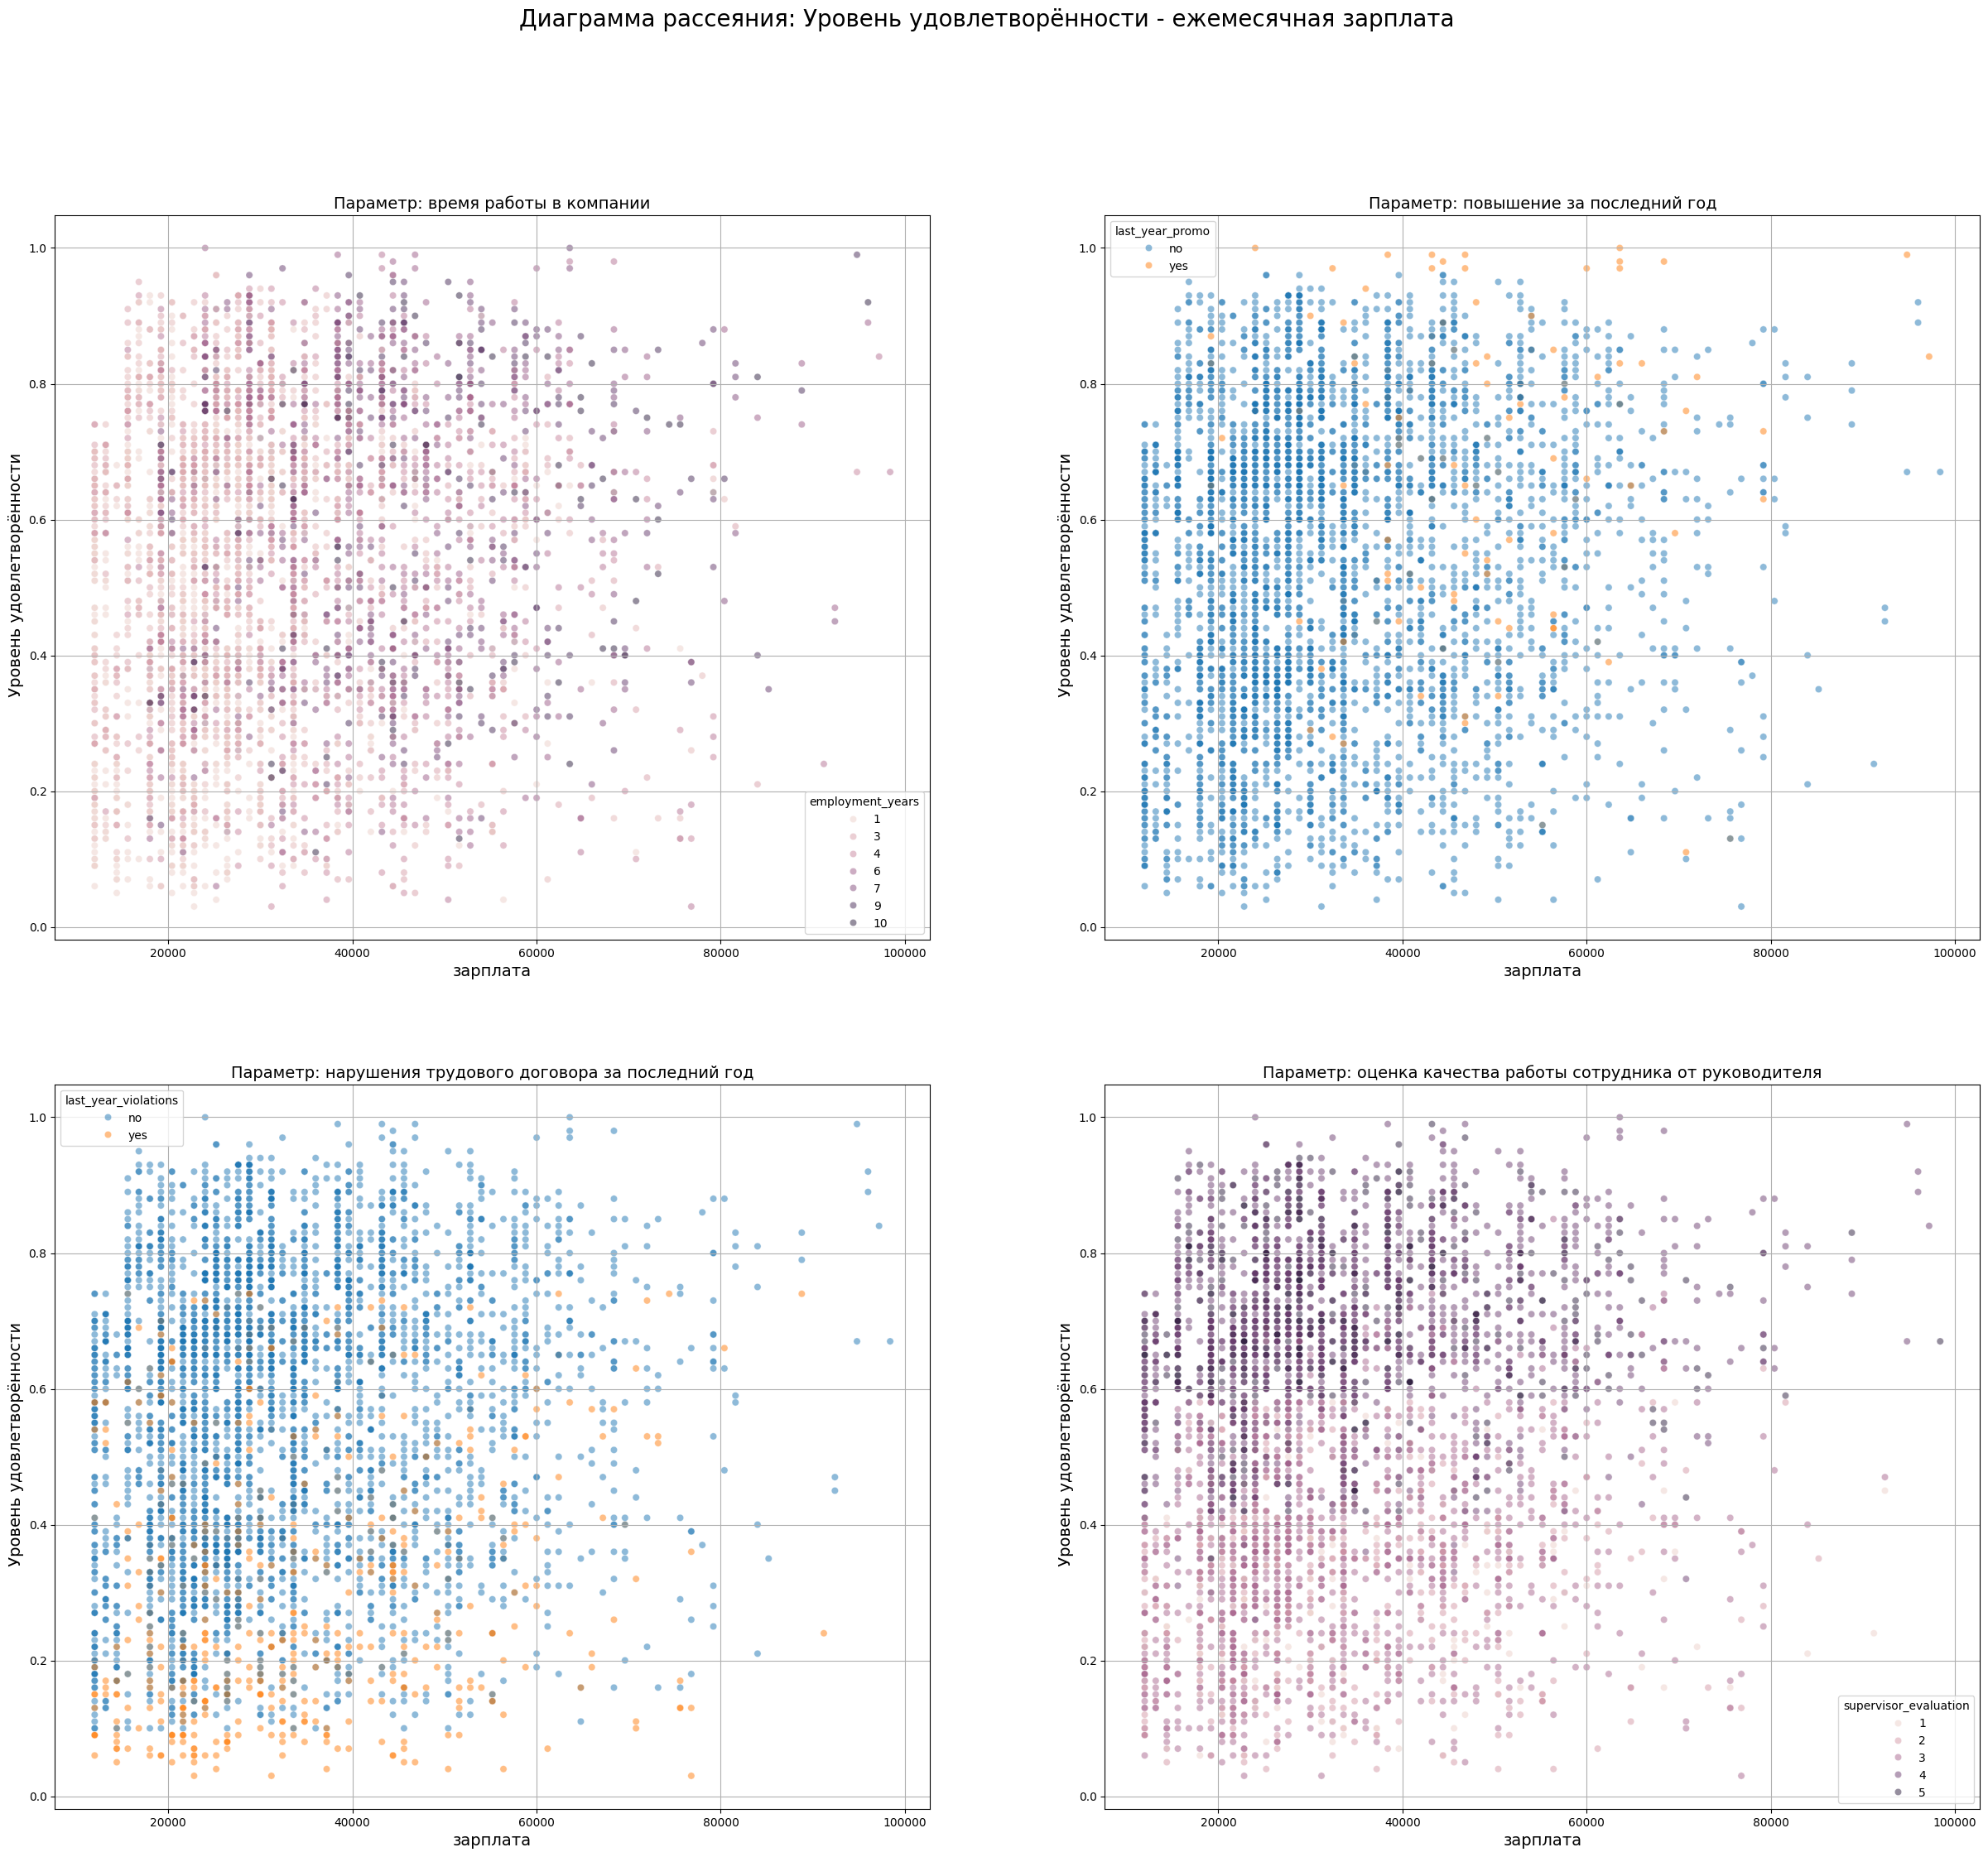

In [49]:
nrows = 2
ncols = 2
fig, axs = plt.subplots(nrows = nrows , ncols = ncols, figsize = (30,25))
fig.suptitle(('Диаграмма рассеяния: Уровень удовлетворённости - ежемесячная зарплата'), fontsize = 20)
set_columns = ['employment_years',
                'last_year_promo',
                'last_year_violations',
                'supervisor_evaluation']
params = ['время работы в компании',
          'повышение за последний год',
          'нарушения трудового договора за последний год',
          'оценка качества работы сотрудника от руководителя']
i = 0

for row in range(nrows):
    for col in range(ncols):
        sns.scatterplot(data = train,
                            x = 'salary',
                            y ='job_satisfaction_rate',
                            ax = axs[row, col],
                            hue = set_columns[i],
                            alpha = 0.5
                           )
        axs[row, col].set_title(('Параметр: ' + params[i]), fontsize = 14)
        axs[row, col].set_ylabel(' Уровень удовлетворённости', fontsize = 14)
        axs[row, col].set_xlabel('зарплата', fontsize = 14)
        axs[row, col].grid(True)
        i = i + 1

plt.show()

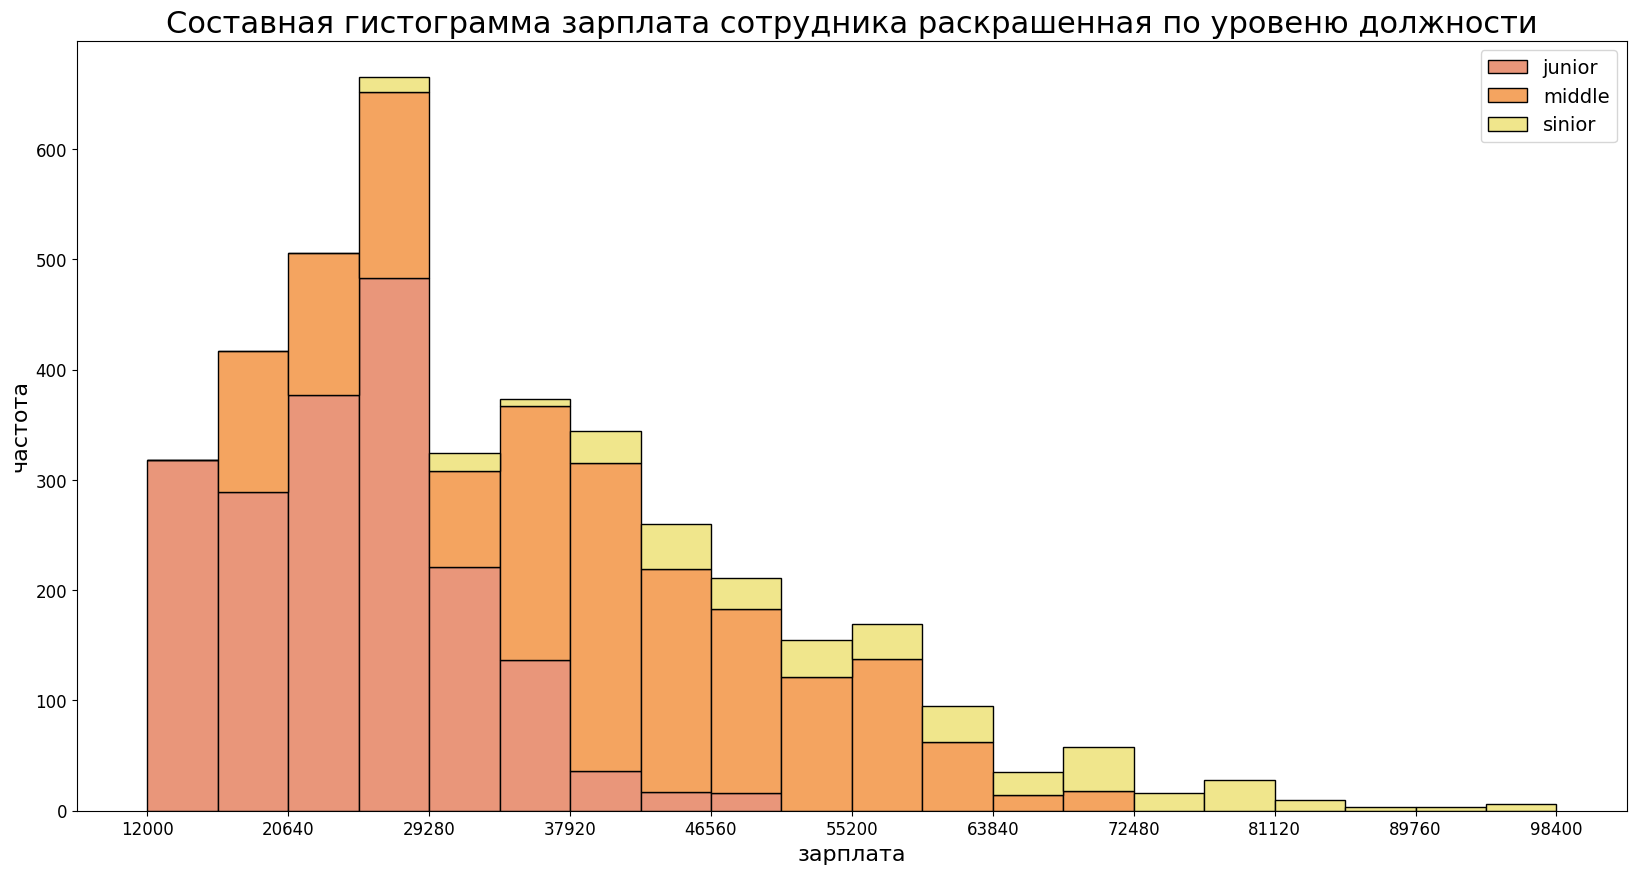

In [50]:
x_var = 'salary'
groupby_var = 'level'
df_agg = train[[x_var, groupby_var]].groupby(groupby_var)
vals = [train[x_var].values.tolist() for i, train in df_agg]

plt.figure(figsize=(20,10))
colors = ['darksalmon', 'sandybrown', 'khaki']
n, bins, patches = plt.hist(vals, 20, stacked = True, density = False, color = colors[:len(vals)], edgecolor='black',)

plt.legend({group:col for group, col in zip(np.unique(train[groupby_var].dropna()).tolist(), colors[:len(vals)])}, fontsize=14)
plt.title('Составная гистограмма зарплата сотрудника раскрашенная по уровеню должности', fontsize=22)
plt.xlabel('зарплата', fontsize=16)
plt.ylabel('частота', fontsize=16)
plt.xticks(ticks=bins[::2], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

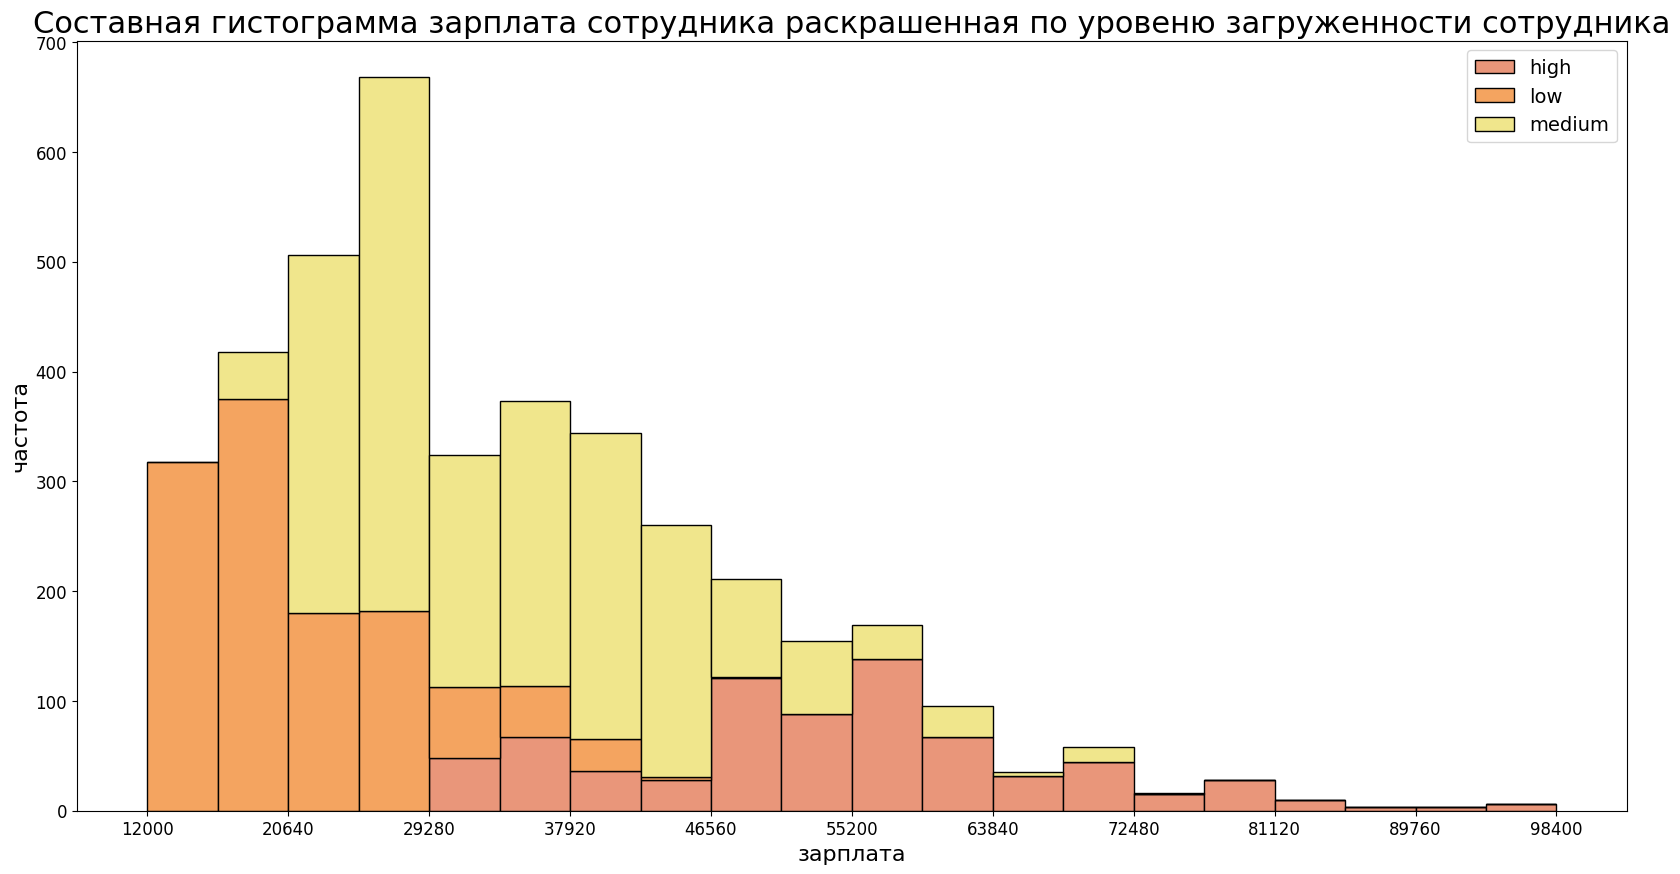

In [51]:
x_var = 'salary'
groupby_var = 'workload'
df_agg = train[[x_var, groupby_var]].groupby(groupby_var)
vals = [train[x_var].values.tolist() for i, train in df_agg]

plt.figure(figsize=(20,10))
colors = ['darksalmon', 'sandybrown', 'khaki']
n, bins, patches = plt.hist(vals, 20, stacked = True, density = False, color = colors[:len(vals)], edgecolor='black',)

plt.legend({group:col for group, col in zip(np.unique(train[groupby_var]).tolist(), colors[:len(vals)])}, fontsize=14)
plt.title('Составная гистограмма зарплата сотрудника раскрашенная по уровеню загруженности сотрудника', fontsize=22)
plt.xlabel('зарплата', fontsize=16)
plt.ylabel('частота', fontsize=16)
plt.xticks(ticks=bins[::2], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [52]:
X_train = train.drop(['job_satisfaction_rate', 'id'], axis = 1)
y_train = train['job_satisfaction_rate']

In [53]:
ohe_columns_regres = ['dept', 'workload', 'level']
ord_columns_regres = ['last_year_violations', 'last_year_promo']
num_columns_regres = ['supervisor_evaluation', 'employment_years', 'salary']

In [54]:
ohe_pipe_regres = Pipeline(
    [('simple_imputer', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')),
    ('ohe', OneHotEncoder (handle_unknown = 'ignore', sparse_output = False))]
)

In [55]:
ord_pipe_regres = Pipeline(
    [('simple_imputer_befor_ord', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')),
    ('ord', OrdinalEncoder(categories = [['no', 'yes'],
                                        ['no', 'yes']],
                           handle_unknown ='use_encoded_value', unknown_value = np.nan)),
    ('simple_imputer_after_ord', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent'))]
)

In [56]:
data_preprocessor_regres = ColumnTransformer([
    ('ohe', ohe_pipe_regres, ohe_columns_regres),
    ('ord', ord_pipe_regres, ord_columns_regres),
    ('num', MinMaxScaler(), num_columns_regres)
], remainder='passthrough')

In [57]:
pipe_final_regres = Pipeline([
    ('preprocessor', data_preprocessor_regres),
    ('models', DecisionTreeRegressor(random_state = RANDOM_STATE))
])

In [58]:
param_grid_regres = [
    {    # словарь для DecisionTreeRegressor
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth':  range(5, 30, 5),
        'models__min_samples_split':range (2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {   # словарь для LinearRegression
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [59]:
# Собственная метрика
def smape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0  # Избегаем деления на ноль

    return 100 * np.mean(diff)

smape_score = make_scorer(smape, greater_is_better = False)

In [60]:
grid_search_regres = GridSearchCV(
    pipe_final_regres,
    param_grid_regres,
    cv = 5,
    scoring = smape_score,
    n_jobs = -1
)

In [61]:
grid_search_regres.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"[{'models': [DecisionTreeR...ndom_state=42)], 'models__max_depth': range(5, 30, 5), 'models__min_samples_split': range(2, 10), 'preprocessor__num': [StandardScaler(), MinMaxScaler(), ...]}, {'models': [LinearRegression()], 'preprocessor__num': [StandardScaler(), MinMaxScaler(), ...]}]"
,scoring,make_scorer(s...hod='predict')
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('ohe', ...), ('ord', ...), ...]"


In [62]:
grid_search_regres.best_score_ * -1

np.float64(14.476170383929837)

In [63]:
grid_search_regres.best_params_

{'models': DecisionTreeRegressor(random_state=42),
 'models__max_depth': 20,
 'models__min_samples_split': 7,
 'preprocessor__num': MinMaxScaler()}

In [64]:
result = pd.DataFrame(grid_search_regres.cv_results_)

In [65]:
result.sort_values(by = 'rank_test_score', ascending = True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_models,param_models__max_depth,param_models__min_samples_split,param_preprocessor__num,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
88,0.054602,0.003734,0.017658,0.005738,DecisionTreeRegressor(random_state=42),20.0,7.0,MinMaxScaler(),{'models': DecisionTreeRegressor(random_state=...,-14.596697,-14.531932,-14.921025,-15.085511,-13.245687,-14.476170,0.648216,1
112,0.085915,0.017360,0.027976,0.010149,DecisionTreeRegressor(random_state=42),25.0,7.0,MinMaxScaler(),{'models': DecisionTreeRegressor(random_state=...,-14.596697,-14.531932,-14.921025,-15.096537,-13.245352,-14.478309,0.650427,2
87,0.058486,0.008528,0.014618,0.000434,DecisionTreeRegressor(random_state=42),20.0,7.0,StandardScaler(),{'models': DecisionTreeRegressor(random_state=...,-14.596697,-14.508745,-14.980960,-15.084844,-13.287577,-14.491765,0.640691,3
111,0.076275,0.021002,0.020190,0.006100,DecisionTreeRegressor(random_state=42),25.0,7.0,StandardScaler(),{'models': DecisionTreeRegressor(random_state=...,-14.596697,-14.508745,-14.980960,-15.095870,-13.287242,-14.493903,0.642870,4
109,0.101155,0.027252,0.021978,0.008326,DecisionTreeRegressor(random_state=42),25.0,6.0,MinMaxScaler(),{'models': DecisionTreeRegressor(random_state=...,-14.652805,-14.780484,-14.893499,-15.160960,-13.024674,-14.502484,0.757666,5


In [66]:
X_train = grid_search_regres.best_estimator_['preprocessor'].transform(X_train)

In [67]:
grid_search_regres.best_estimator_['models'].fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,20
,min_samples_split,7
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [68]:
X_test_new = X_test.sort_values(by = 'id', ascending = True).drop(['id'], axis = 1)

In [69]:
y_test_new = y_test.sort_values(by = 'id', ascending = True)['job_satisfaction_rate']

In [70]:
y_pred = grid_search_regres.best_estimator_.predict(X_test_new)

In [71]:
smape_test = smape(y_test_new, y_pred)

In [72]:
smape_test

np.float64(14.009965604057697)

In [73]:
dummy_regressor = DummyRegressor( strategy = 'median')
dummy_regressor.fit(X_train, y_train)
dummy_regressor_pred = dummy_regressor.predict(X_test)
smape(y_test_new, dummy_regressor_pred)

np.float64(37.55296523042534)

In [74]:
feature_importances_regres = pd.DataFrame(
    {
        'Feature': grid_search_regres.best_estimator_['preprocessor'].get_feature_names_out(),
        'Importance': grid_search_regres.best_estimator_['models'].feature_importances_
    })

In [75]:
feature_importances_regres.sort_values(by = 'Importance', ascending = False)

,Feature,Importance
13,num__supervisor_evaluation,0.666762
15,num__salary,0.086927
14,num__employment_years,0.074413
11,ord__last_year_violations,0.049993
8,ohe__level_junior,0.041408
12,ord__last_year_promo,0.011945
4,ohe__dept_technology,0.011658
3,ohe__dept_sales,0.009213
7,ohe__workload_medium,0.008540
6,ohe__workload_low,0.008056


In [76]:
X_test_pre = pd.DataFrame(grid_search_regres.best_estimator_['preprocessor'].transform(X_test_new),
                          columns = grid_search_regres.best_estimator_['preprocessor'].get_feature_names_out())

In [77]:
explainer = shap.TreeExplainer(grid_search_regres.best_estimator_['models'])
shap_values_regres = explainer(X_test_pre)

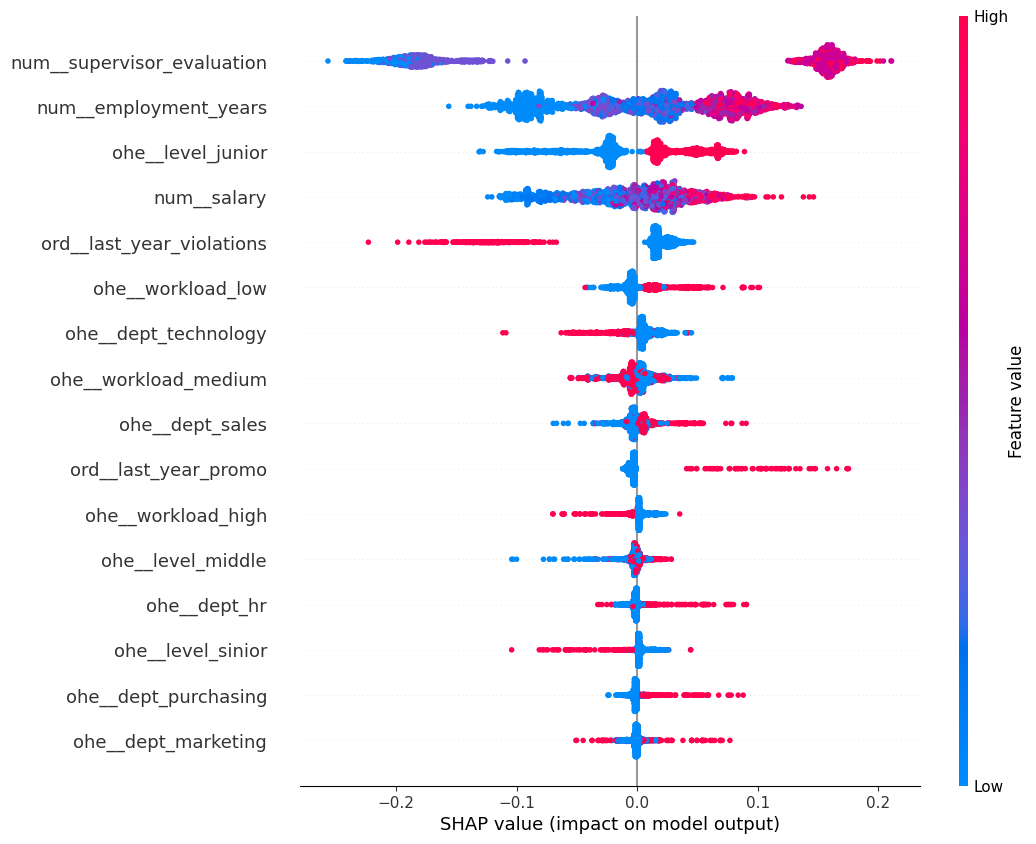

In [78]:
shap.plots.beeswarm(shap_values_regres, plot_size = (10,10), max_display = 16)
plt.show()